In [1]:
from google.colab import files
upload=files.upload()

Saving Stores.csv to Stores.csv


In [58]:
#Importing Packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
%matplotlib inline

In [3]:
#Import of the CSV file
df=pd.read_csv("Stores.csv")


In [4]:
#Top 5 rows of the data
df.head()


,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620


In [6]:
#shape - 896 rows / 5 columns
df.shape

(896, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Store ID              896 non-null    int64
 1   Store_Area            896 non-null    int64
 2   Items_Available       896 non-null    int64
 3   Daily_Customer_Count  896 non-null    int64
 4   Store_Sales           896 non-null    int64
dtypes: int64(5)
memory usage: 35.1 KB


In [8]:
#Finding out the number of empty cells in the dataset
df.isnull().sum()

,0
Store ID,0
Store_Area,0
Items_Available,0
Daily_Customer_Count,0
Store_Sales,0


In [9]:
#Descriptive Statistics of the Dataset
df.describe()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
count,896.000000,896.000000,896.000000,896.000000,896.000000
mean,448.500000,1485.409598,1782.035714,786.350446,59351.305804
std,258.797218,250.237011,299.872053,265.389281,17190.741895
min,1.000000,775.000000,932.000000,10.000000,14920.000000
25%,224.750000,1316.750000,1575.500000,600.000000,46530.000000
50%,448.500000,1477.000000,1773.500000,780.000000,58605.000000
75%,672.250000,1653.500000,1982.750000,970.000000,71872.500000
max,896.000000,2229.000000,2667.000000,1560.000000,116320.000000


In [10]:
#Finding out the range of the Store Sales


rng=df['Store_Sales'].max()-df['Store_Sales'].min()
rng

101400

In [12]:
#Conducting z test to find out outliers
#assumed that the data to be normal and to prove its normality, we are conducting the z test
x=df["Store_Sales"]
mean=df["Store_Sales"].mean()
std=df["Store_Sales"].std()
z= (x-mean)/std
z

,Store_Sales
0,0.415264
1,-1.136153
2,-0.310708
3,-0.326996
4,-0.740591
...,...
891,0.409447
892,1.322147
893,0.994064
894,2.167370


In [14]:
#Adding the z values to the dataset
df["z-score"] = z


In [15]:
df.head()


,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales,z-score
0,1,1659,1961,530,66490,0.415264
1,2,1461,1752,210,39820,-1.136153
2,3,1340,1609,720,54010,-0.310708
3,4,1451,1748,620,53730,-0.326996
4,5,1770,2111,450,46620,-0.740591


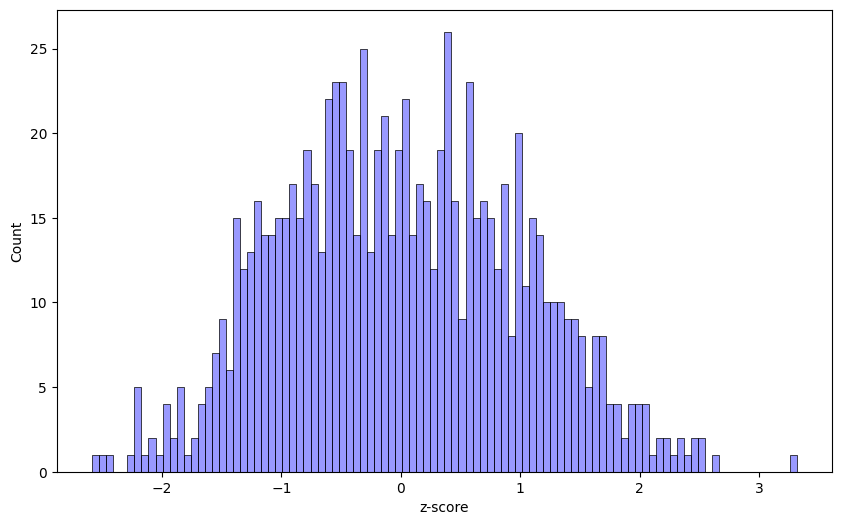

In [47]:
#Plotting the z values
ax = plt.figure(figsize=(10,6))
sns.histplot(df['z-score'], color="blue", bins=100, alpha=0.4)

plt.show()

There are certain values present outside the threshold of 99.7%

Outlier in the Dataset is at index 649




In [22]:
outl=df[df["z-score"]>3]
outl

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales,z-score
649,650,1989,2414,860,116320,3.313917


/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable h

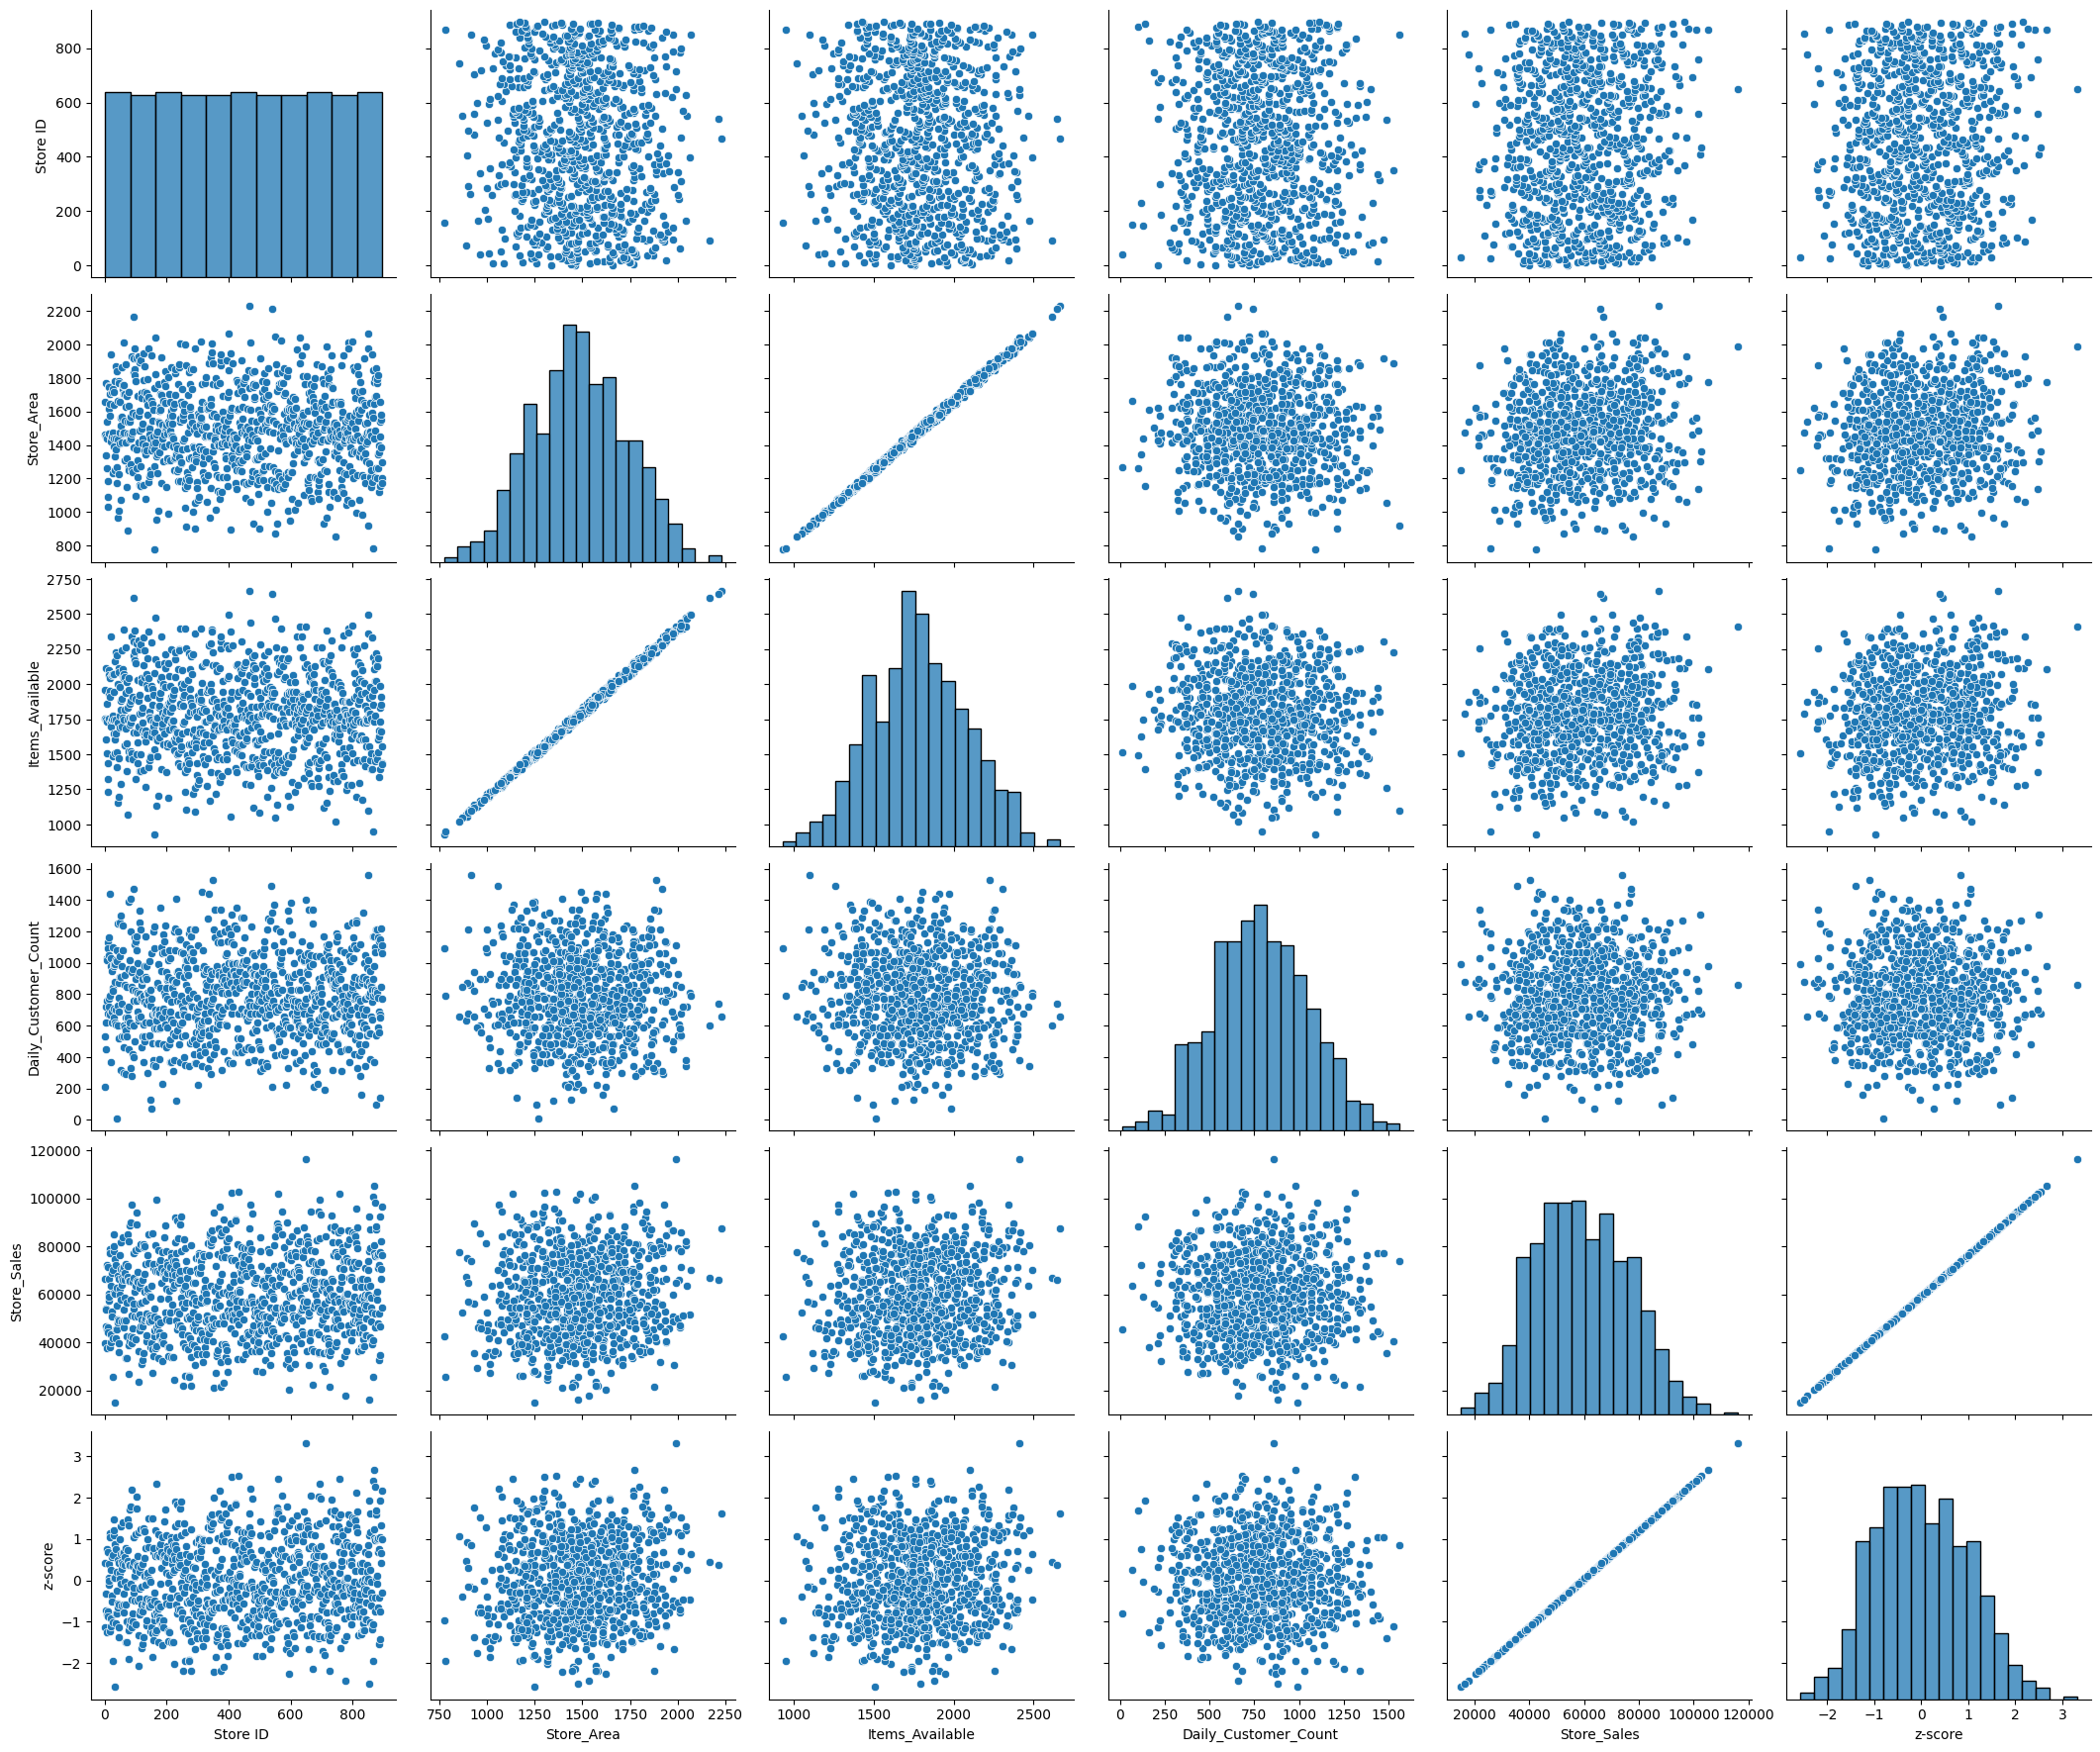

In [38]:
#Scatterplot of the Dataset
sns.pairplot(df,palette='Paired', height=3, aspect=1.2 )

plt.show()

In [31]:
#pairwise correlation matrix
df_corr = df[['Store_Area',
    'Items_Available','Daily_Customer_Count','Store_Sales','z-score']].dropna().corr()
df_corr

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales,z-score
Store_Area,1.000000,0.998891,-0.041423,0.097474,0.097474
Items_Available,0.998891,1.000000,-0.040978,0.098849,0.098849
Daily_Customer_Count,-0.041423,-0.040978,1.000000,0.008629,0.008629
Store_Sales,0.097474,0.098849,0.008629,1.000000,1.000000
z-score,0.097474,0.098849,0.008629,1.000000,1.000000


Density curve shows the frequency of number of items present in each store


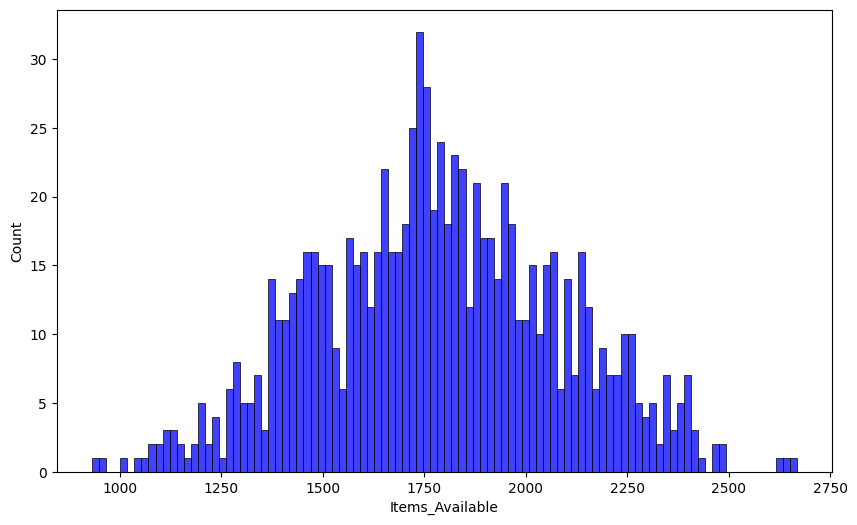

In [46]:
ax = plt.figure(figsize=(10,6))
sns.histplot(df["Items_Available"], color="blue", bins=100)
plt.show()

Scatterplot between the Store Area and Items Available


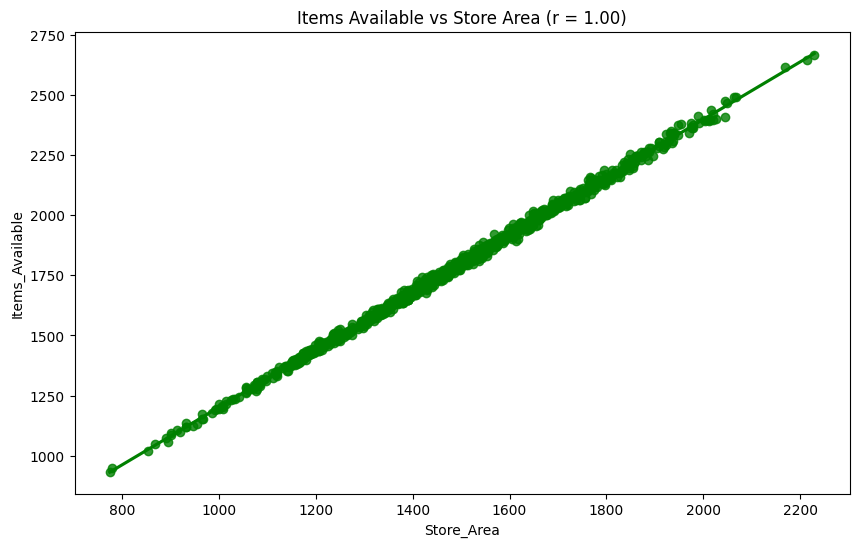

In [62]:
corr_coef, _ = pearsonr(df['Store_Area'], df['Items_Available'])

plt.figure(figsize=(10, 6))
sns.regplot(x='Store_Area', y='Items_Available', data=df, color='green')
plt.title(f"Items Available vs Store Area (r = {corr_coef:.2f})")
plt.show()


Scatterplot between the Store Sales and Items Available


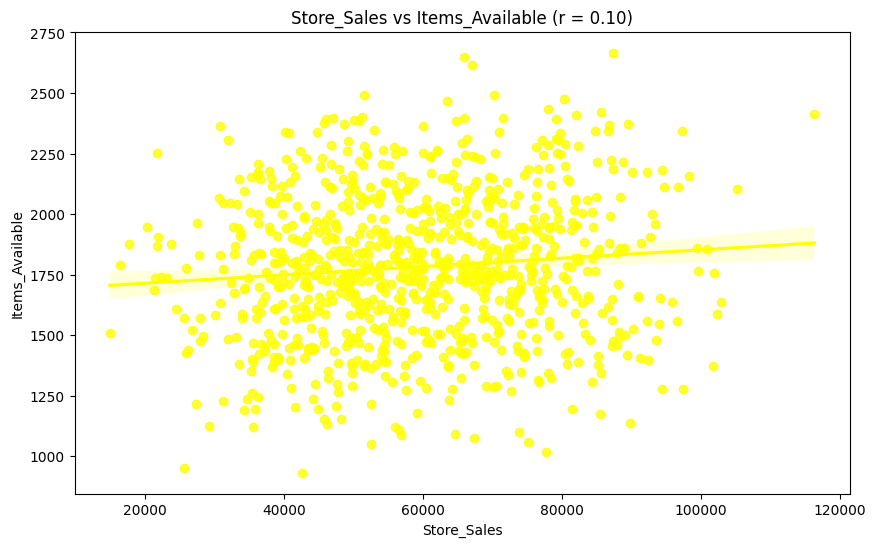

In [60]:
corr_coef, _ = pearsonr(df['Store_Sales'], df['Items_Available'])
plt.figure(figsize=(10, 6))
sns.regplot(x='Store_Sales', y='Items_Available', data=df, color='yellow')
plt.title(f"Store_Sales vs Items_Available (r = {corr_coef:.2f})")

plt.show()


Scatterplot between the Store Sales and Store Area


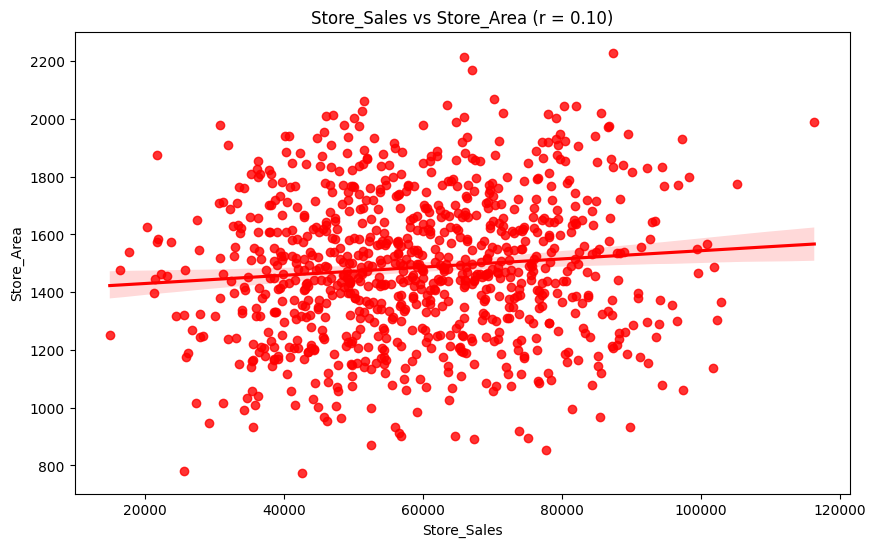

In [59]:
corr_coef, _ = pearsonr(df['Store_Sales'], df['Store_Area'])

plt.figure(figsize=(10, 6))
sns.regplot(x='Store_Sales', y='Store_Area', data=df, color='red')
plt.title(f"Store_Sales vs Store_Area (r = {corr_coef:.2f})")
plt.show()

Scatterplot between the Store Sales and Daily Customer Count

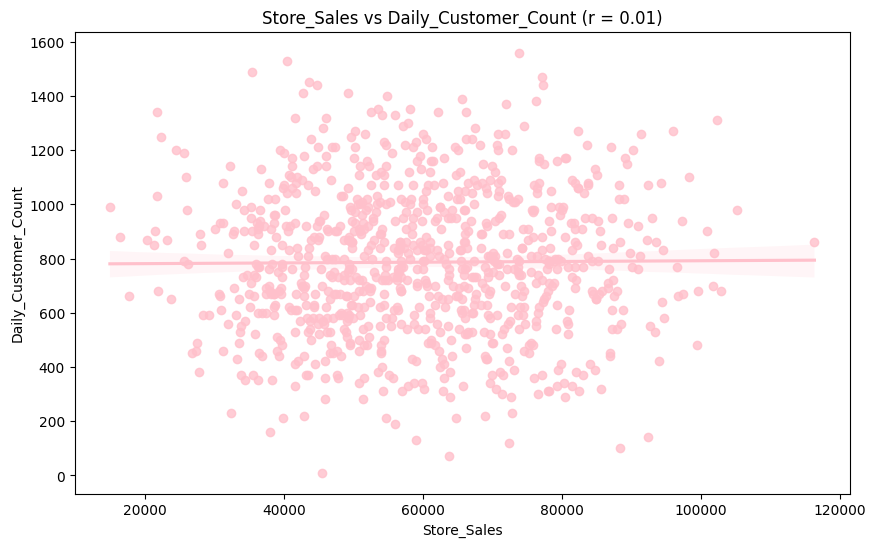

In [63]:
corr_coef, _ = pearsonr(df['Store_Sales'], df['Daily_Customer_Count'])

plt.figure(figsize=(10, 6))
sns.regplot(x='Store_Sales', y='Daily_Customer_Count', data=df, color='pink')
plt.title(f"Store_Sales vs Daily_Customer_Count (r = {corr_coef:.2f})")
plt.show()

Correlation of the different variables


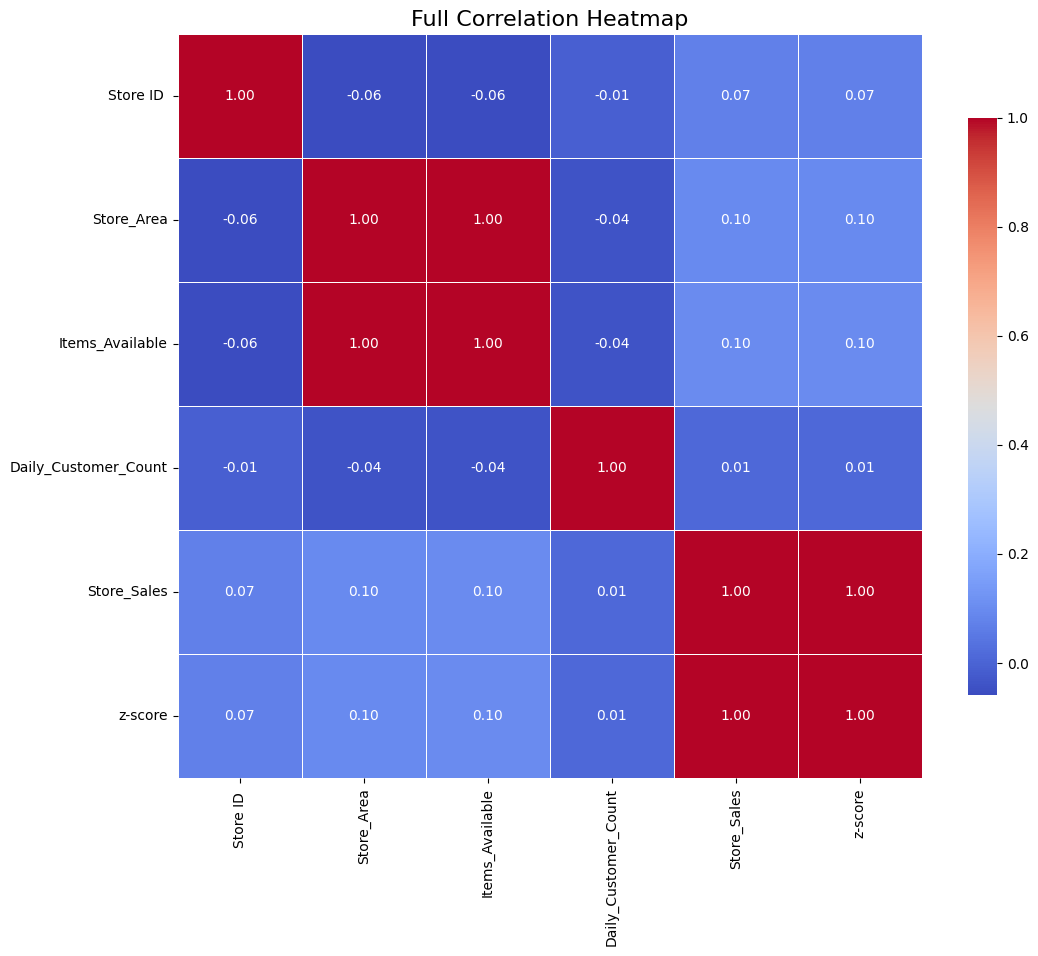

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the full heatmap
sns.heatmap(
    corr,
    cmap='coolwarm',
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    linecolor='white',
    square=True,
    cbar_kws={"shrink": 0.75},
    annot_kws={"size": 10}
)

# Add a title to the heatmap
plt.title("Full Correlation Heatmap", fontsize=16)

# Display the heatmap
plt.show()


##Model 1:
Assigning the independant and depenant variables as X and y respectively

In [68]:
X=df[["Daily_Customer_Count"]]
y=df[["Store_Sales"]]

Importing Train Test Split

In [69]:
from sklearn.model_selection import train_test_split

Assigning test size to 20%

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Importing Linear Regression

In [72]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()



Fitting the data in the model



In [73]:
lr.fit(X_train,y_train)

LinearRegression()

The Intercept of the data



In [74]:
intercept=lr.intercept_
intercept

array([59900.61346603])

Coefficient of the data



In [75]:
coef=lr.coef_[0]
coef

array([-0.92995614])

Predicting the data


In [77]:
pred = lr.predict(X_test)

Plotting the testing and the predicted data



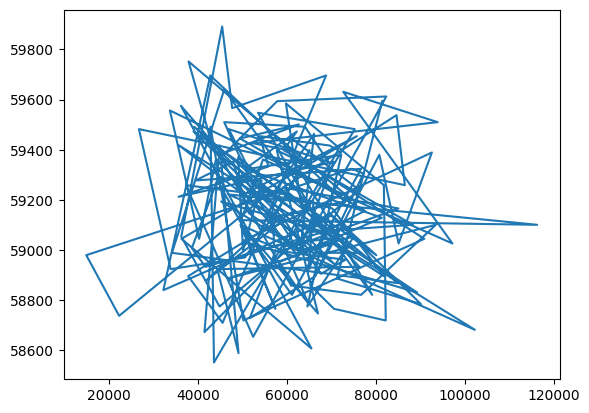

In [90]:
plt.plot(y_test, pred)
plt.show()

There looks no explanation or fitting through the model



Finding the R squared value to find out how well the model is explained



In [80]:
from sklearn.metrics import r2_score
r2=(r2_score(y_test,pred))
print(r2*100)

-0.6291680857297921


The model looks very undexplained maybe due to underfitting



Absolute Error in the data



In [81]:
from sklearn.metrics import mean_absolute_error
error = mean_absolute_error(y_test, pred)
error

13318.772007845078

The model has a high error making it a failed model



##Model 2

In [82]:
X1=df[["Store_Area"]]
y1=df[["Items_Available"]]

In [83]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [84]:
lr1 = LinearRegression()

Fitting the new model into linear regression



In [85]:
lr1.fit(X1_train,y1_train)

LinearRegression()

Intercept of the model

In [86]:
intercept1=lr1.intercept_
intercept1

array([5.28213962])

Coefficient of the model



In [87]:
coef1=lr1.coef_[0]
coef1

array([1.1960332])

In [92]:
pred1 = lr1.predict(X1_test)

Plotting the test and predicted data

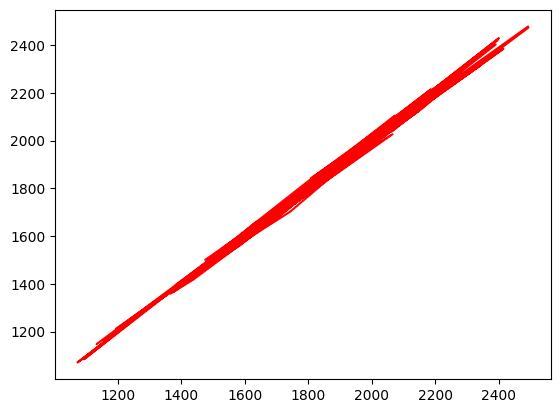

In [94]:
plt.plot(y1_test, pred1, color = 'red' )
plt.show()

There seems to be relation between tested and predicted data



Finding out the R squared data



In [95]:
from sklearn.metrics import r2_score
r2_1=(r2_score(y1_test,pred1))
print(r2_1*100)

99.75369279818469


The model is able to explain 99% of the data



Absolute error in the data



In [96]:
from sklearn.metrics import mean_absolute_error
error1 = mean_absolute_error(y1_test, pred1)
error1

11.944631101516526

The data indicates low error making it a good model


##Conclusion

Model 2 demonstrates a strong explanatory capability, accounting for approximately 99% of the variance in the data. This indicates a robust relationship between the variables. Specifically, as the store area expands, there is a corresponding increase in the number of items available, and the reverse holds true as well.